In [1]:
###DATA ANALYSIS WITH PYTHON###


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd=pd.read_csv('S1Data.csv')
pd

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582
295,244,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582
296,14,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582
297,80,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897


DATA CLEANING AND DATA PREPROCESSING


In [3]:
pd.head()


,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [4]:
pd['Event'].value_counts(normalize = True)

Event
0    0.67893
1    0.32107
Name: proportion, dtype: float64

In [5]:
pd.tail()


,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
294,250,0,0,0,1,0,0,45.0,55,132,1.0,543000.0,582
295,244,0,0,0,1,0,0,51.0,40,134,0.9,221000.0,582
296,14,1,1,0,0,0,0,45.0,14,127,0.8,166000.0,582
297,80,0,1,0,1,0,0,60.0,45,133,1.0,297000.0,897
298,16,0,0,0,0,1,1,65.0,25,137,1.3,276000.0,52


In [6]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TIME               299 non-null    int64  
 1   Event              299 non-null    int64  
 2   Gender             299 non-null    int64  
 3   Smoking            299 non-null    int64  
 4   Diabetes           299 non-null    int64  
 5   BP                 299 non-null    int64  
 6   Anaemia            299 non-null    int64  
 7   Age                299 non-null    float64
 8   Ejection.Fraction  299 non-null    int64  
 9   Sodium             299 non-null    int64  
 10  Creatinine         299 non-null    float64
 11  Pletelets          299 non-null    float64
 12  CPK                299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
pd.describe()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


##NUMERICAL ANALYSIS AND VISUALIZATION


In [8]:
pd['TIME'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: TIME, dtype: float64

<Axes: >

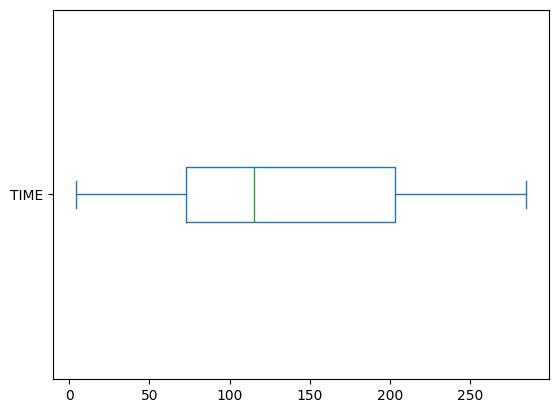

In [9]:
pd['TIME'].plot(kind='box', vert=False)

<Axes: ylabel='Density'>

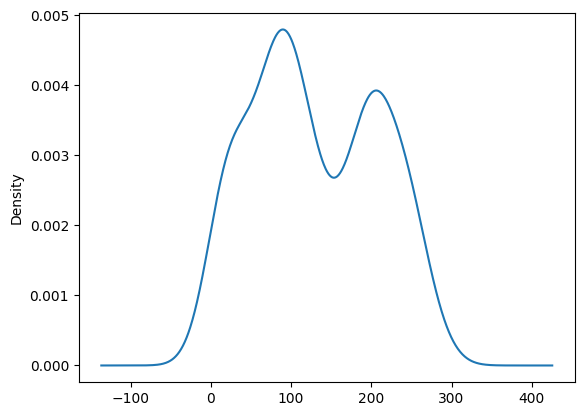

In [10]:
pd['TIME'].plot(kind='density')

In [11]:
pd['Smoking'].value_counts()


Smoking
0    203
1     96
Name: count, dtype: int64

In [12]:
pd['TIME'].value_counts()

TIME
250    7
187    7
186    6
10     6
107    6
      ..
200    1
206    1
106    1
61     1
16     1
Name: count, Length: 148, dtype: int64

In [13]:
pd['Event'].value_counts()

Event
0    203
1     96
Name: count, dtype: int64

<Axes: title={'center': ' Censored and Uncensored data'}, xlabel='Event', ylabel='Counts'>

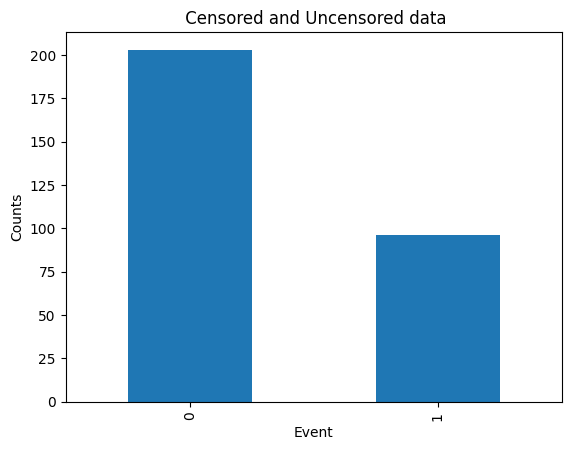

In [14]:
pd['Event'].value_counts().plot(kind='bar',ylabel='Counts',title=' Censored and Uncensored data')

RELATIONSHIP BTWEEN THE COLUMNS

In [15]:
corr=pd.corr()
corr

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
TIME,1.000000,-0.526964,-0.015608,-0.022839,0.033726,-0.196439,-0.141414,-0.224068,0.041729,0.087640,-0.149315,0.010514,-0.009346
Event,-0.526964,1.000000,-0.004316,-0.012623,-0.001943,0.079351,0.066270,0.253729,-0.268603,-0.195204,0.294278,-0.049139,0.062728
Gender,-0.015608,-0.004316,1.000000,0.445892,-0.157730,-0.104615,-0.094769,0.065430,-0.148386,-0.027566,0.006970,-0.125120,0.079791
Smoking,-0.022839,-0.012623,0.445892,1.000000,-0.147173,-0.055711,-0.107290,0.018668,-0.067315,0.004813,-0.027414,0.028234,0.002421
Diabetes,0.033726,-0.001943,-0.157730,-0.147173,1.000000,-0.012732,-0.012729,-0.101012,-0.004850,-0.089551,-0.046975,0.092193,-0.009639
BP,-0.196439,0.079351,-0.104615,-0.055711,-0.012732,1.000000,0.038182,0.093289,0.024445,0.037109,-0.004935,0.049963,-0.070590
Anaemia,-0.141414,0.066270,-0.094769,-0.107290,-0.012729,0.038182,1.000000,0.088006,0.031557,0.041882,0.052174,-0.043786,-0.190741
Age,-0.224068,0.253729,0.065430,0.018668,-0.101012,0.093289,0.088006,1.000000,0.060098,-0.045966,0.159187,-0.052354,-0.081584
Ejection.Fraction,0.041729,-0.268603,-0.148386,-0.067315,-0.004850,0.024445,0.031557,0.060098,1.000000,0.175902,-0.011302,0.072177,-0.044080
Sodium,0.087640,-0.195204,-0.027566,0.004813,-0.089551,0.037109,0.041882,-0.045966,0.175902,1.000000,-0.189095,0.062125,0.059550


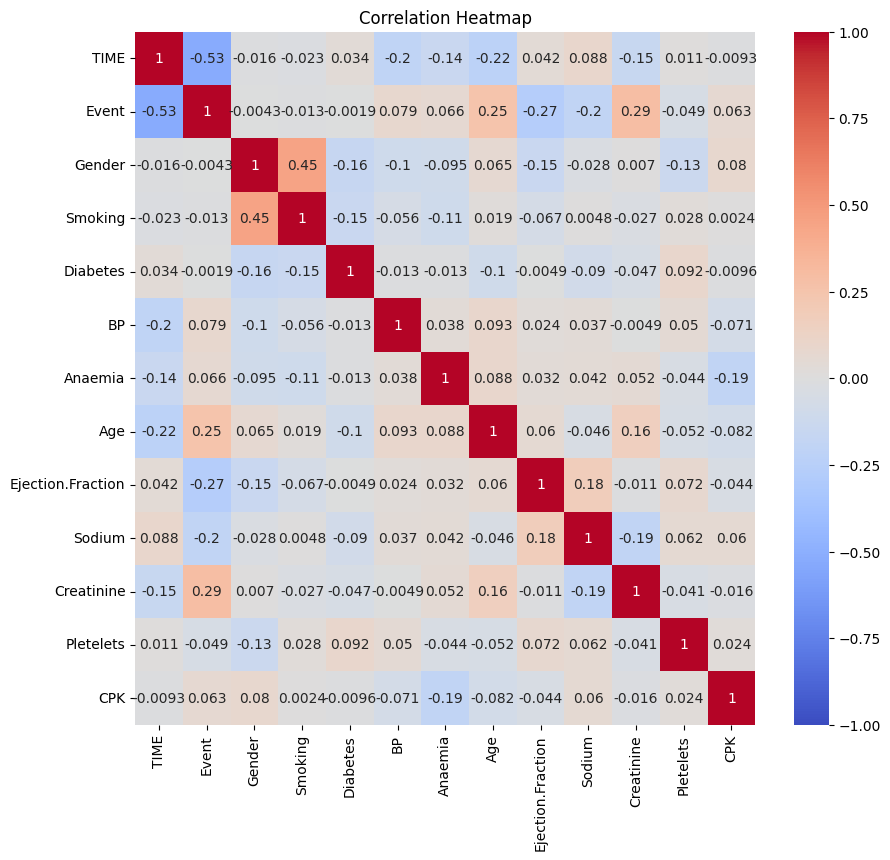

In [16]:
plt.figure(figsize=(10, 9))
plt.xticks(rotation=90) 
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Event')

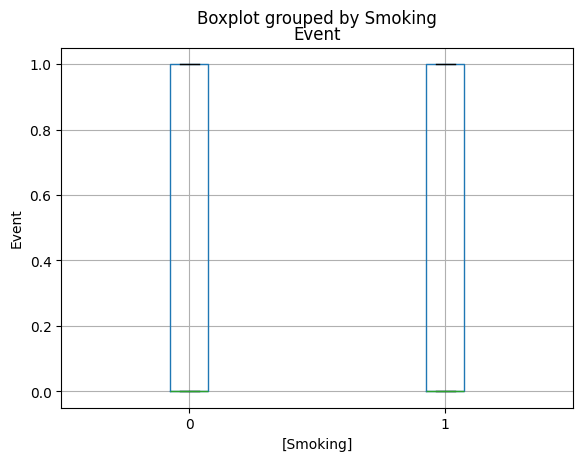

In [17]:
ax=pd[['Smoking','Event']].boxplot(by='Smoking')
ax.set_ylabel('Event')

COLUMN WRANGLING


In [18]:
pd['TIME_per_Age']=pd['TIME']/pd['Age']
pd['TIME_per_Age'].head()

0    2.255814
1    2.465753
2    0.442857
3    1.338462
4    1.765625
Name: TIME_per_Age, dtype: float64

<Axes: ylabel='Density'>

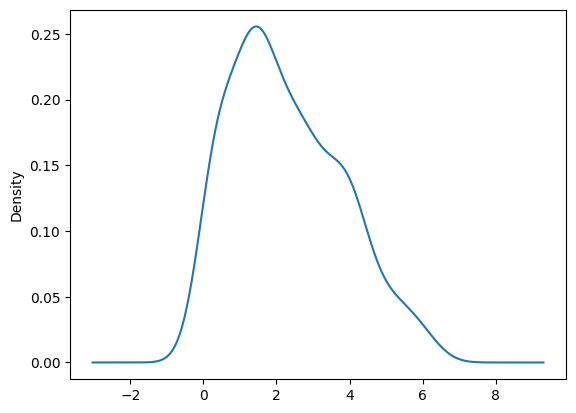

In [19]:
pd['TIME_per_Age'].plot(kind='density')

#SELECTION & INDEXING

In [20]:
pd.loc[pd['Event']==1]

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,TIME_per_Age
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,0.442857
5,10,1,1,0,0,0,1,75.0,15,137,1.20,127000.00,246,0.133333
7,27,1,1,0,1,1,0,94.0,38,134,1.83,263358.03,582,0.287234
12,13,1,1,0,0,0,1,82.0,50,136,1.30,47000.00,379,0.158537
13,4,1,1,0,0,1,0,75.0,20,130,1.90,265000.00,582,0.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,30,1,0,0,1,0,0,60.0,38,142,3.00,329000.00,235,0.500000
284,55,1,1,1,0,1,0,49.0,20,136,1.10,319000.00,789,1.122449
291,15,1,0,0,0,1,1,70.0,25,140,1.00,237000.00,125,0.214286
292,15,1,0,0,1,0,1,48.0,55,121,1.90,87000.00,582,0.312500


In [21]:
pd.loc[pd['Age']==50]

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,TIME_per_Age
10,119,0,1,1,1,0,0,50.0,35,137,1.18,263358.03,1846,2.38
11,112,0,1,1,0,0,0,50.0,30,141,0.70,266000.00,185,2.24
18,240,0,1,1,0,0,1,50.0,35,140,0.90,362000.00,298,4.80
20,192,0,1,1,0,1,0,50.0,62,140,0.80,147000.00,582,3.84
26,250,0,1,0,0,0,1,50.0,40,141,0.80,279000.00,54,5.00
36,175,0,1,0,1,0,1,50.0,40,130,0.70,260000.00,121,3.50
46,60,1,0,0,0,1,0,50.0,40,131,2.30,216000.00,318,1.20
51,28,1,0,0,1,1,1,50.0,35,128,1.00,319000.00,249,0.56
70,172,1,0,0,0,0,0,50.0,50,134,0.60,153000.00,582,3.44
80,120,0,1,1,0,0,0,50.0,25,136,1.00,262000.00,250,2.40


In [22]:
pd.loc[pd['Age']==50].count()

TIME                 27
Event                27
Gender               27
Smoking              27
Diabetes             27
BP                   27
Anaemia              27
Age                  27
Ejection.Fraction    27
Sodium               27
Creatinine           27
Pletelets            27
CPK                  27
TIME_per_Age         27
dtype: int64

In [23]:
pd.loc[pd['Event']==1,'Smoking']

2      1
5      0
7      0
12     0
13     0
      ..
279    0
284    1
291    0
292    0
296    0
Name: Smoking, Length: 96, dtype: int64

In [24]:
pd.loc[(pd['Event']==1)&(pd['Smoking']==1)]

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,TIME_per_Age
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582,0.442857
22,26,1,1,1,1,1,0,70.0,45,136,1.30,284000.00,122,0.371429
44,20,1,1,1,0,1,1,68.0,35,140,0.90,289000.00,220,0.294118
49,33,1,1,1,1,1,0,70.0,45,139,1.20,185000.00,571,0.471429
60,59,1,1,1,1,1,0,72.0,20,136,1.30,254000.00,364,0.819444
72,10,1,1,1,1,0,1,60.0,60,131,1.10,454000.00,315,0.166667
98,88,1,0,1,0,1,1,72.0,30,138,1.70,621000.00,328,1.222222
105,72,1,1,1,0,0,0,85.0,35,132,1.00,243000.00,5882,0.847059
119,7,1,1,1,0,0,0,65.0,20,129,1.30,162000.00,146,0.107692
123,8,1,1,1,0,1,1,90.0,40,132,2.10,204000.00,47,0.088889


MODEL AND PREDICTIONS


In [25]:
X=pd.drop('Event',axis=1)
y=pd['Event']

In [26]:
pd['Event']

0      0
1      0
2      1
3      0
4      0
      ..
294    0
295    0
296    1
297    0
298    0
Name: Event, Length: 299, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [29]:

def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    Accuracy_score= accuracy_score (y_test,predictions) 
    print("Accuracy_score is: {}".format(Accuracy_score))

  

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
predict(RandomForestClassifier())

Model is: RandomForestClassifier()
Training score: 1.0
Predictions are: [0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]


Accuracy_score is: 0.85


In [33]:
predict(LogisticRegression())

Model is: LogisticRegression()
Training score: 0.8326359832635983
Predictions are: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]


Accuracy_score is: 0.8


In [34]:
predict(KNeighborsClassifier())


Model is: KNeighborsClassifier()
Training score: 0.7405857740585774
Predictions are: [0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]


Accuracy_score is: 0.7
